# Problem Set 6: Neural Networks


<span style="color:red">Warning!</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

# Section 1: Neural Network Architecture

In the first section of this problem set, we'll spend some time examining neural network model architecture. Please type in your answers after each question -- this section requires no coding.

### Question 1.1

Consider an input image of dimensions 150 X 150 X 3: i.e., height and width of 150 pixels, with 3 channels.

- 1.1.1 Suppose you feed this image into a fully connected (dense) layer with 512 neurons. How many learnable / trainable parameters (or weights) does this layer have?
    
- 1.1.2 Now, suppose we feed this image into a Conv2D layer with 512 filters, kernel size 3 x 3, and stride 1 (assume 0 padding). How many learnable / trainable parameters (or weights) does this layer have?

#### Your Answer Here

1.1.1: 150X150X3X512(without bias terms)+512 =34,560,512

1.1.2: 512X3X3X3(without bias terms)+512=14336

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')
!ls
!cd images/

images	INFO251-S24-PS6.ipynb  Untitled0.ipynb


### Question 1.2

Consider the following CNN, and answer the related questions. Assume that your input images are of dimensions (150, 150, 3): i.e., height and width of 150 pixels, with 3 channels.

**1.2.1**: Complete the table -- fill in the missing entries (A, B, C, D). For each missing entry, provide a brief explanation for your answer (No more than 2 brief sentences.)

- Hint: The Keras documentation [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) will be of use

![Model image](https://drive.google.com/uc?id=1L0fjOVPpZHrgDbFIbFg9h5IEOoeWbtmx)

**1.2.2**: Report the total number of parameters in this model?

**1.2.3**: Consider Layer 2 from above. Suppose we change the stride to 2, how does it affect the output shape (A) that you calculated above? How does it affect the number of parameters (B)?

#### Your Answer Here

**1.2.1**:
 A = (146, 146, 64) B = 64x(3x3X32+1) =18496
 C = (73, 73, 64)  D = 64X(3X3X64+1) =36928

**1.2.2**:

total number = 896+B+D = 56320
    
**1.2.3**:

A<- (74, 74, 64)
B: no changes




# Section 2: Truck v/s Cars: Neural Networks and Image Classification

Your goal for this problem set is to train neural network models for image classification. Specifically, your task is to train models that correctly predict where the vehicle in a given image is a truck, or a car / automobile.

It might be useful to start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

## 2.1. Load Data +  Exploratory Analysis

For this problem, we'll load the [CIFAR 10](https://keras.io/api/datasets/cifar10/) dataset, from the Keras API. This dataset has been widely used in ML and computer vision research -- you can read more about the state of the art model performance (and how this has improved over time) [here](https://en.wikipedia.org/wiki/CIFAR-10).

The CIFAR 10 dataset originally has 10 classes -- we've provided helper code below to load the data, and remove images belonging to unnecessary classes. We will use this dataset for a supervised binary classification problem.

Your tasks:
 - Extract a validation set from your training data. Keep 70% of the images for training, while the remainder will be used for validation.
 - Examine a single image in from your training set. Report the dimensions (width, height, number of channels.) Plot each channel.
 - Select 9 random images from your training set. Plot these images in a 3 X 3 grid, along with the corresponding category / label
 - Plot the distribution of labels in your training, validation and test sets.


In [4]:
from keras.datasets import cifar10
import numpy as np
def cifar_2classes():
    """
    Helper code to clean the CIFAR 10 dataset, and remove the unnecessary classes.
    """
    ## Load data
    label_names = ["airplane",
             "automobile",
             "bird",
             "cat",
             "deer",
             "dog",
             "frog",
             "horse",
             "ship",
             "truck"]


    label_map = {0:99, 1:0, 2:99, 3:99, 4:99, 5:99, 6:99, 7:99, 8:99, 9:1}

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()
    y_train_val1 = np.array([[label_map[y[0]]] for y in y_train_val])
    y_test1 = np.array([[label_map[y[0]]] for y in y_test])

    X_train_val_clean = X_train_val[np.where(y_train_val1 != 99)[0]]
    y_train_val_clean =  y_train_val1[np.where(y_train_val1 != 99)]

    X_test_clean = X_test[np.where(y_test1 != 99 )[0]]
    y_test_clean = y_test1[np.where(y_test1 != 99)]

    return X_train_val_clean, y_train_val_clean, X_test_clean, y_test_clean

In [5]:
## Load data
X_train_val, y_train_val, X_test, y_test = cifar_2classes()

## Split into train, validation and test.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=42)  # 0.3 x 0.8 = 0.24


170498071/170498071 [==============================] - 4s 0us/step


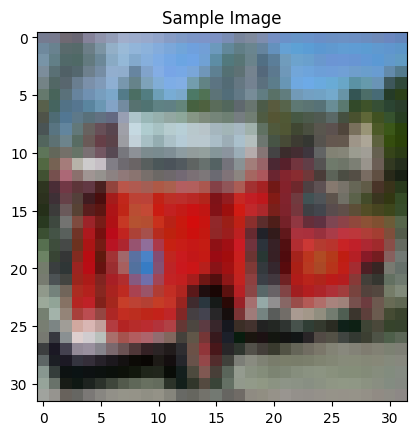

(32, 32, 3)


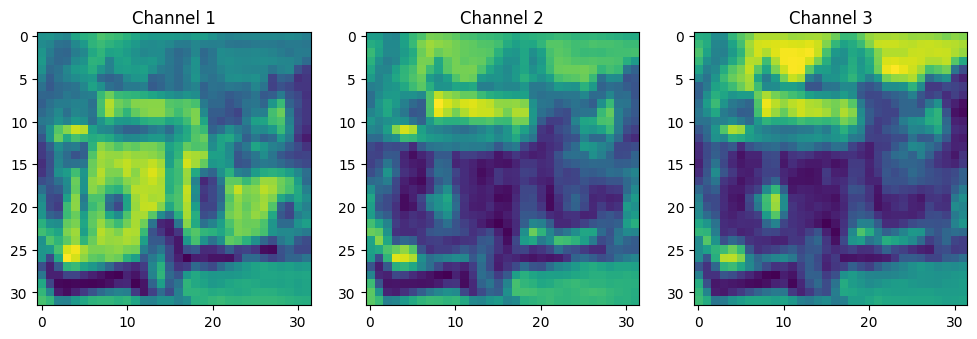

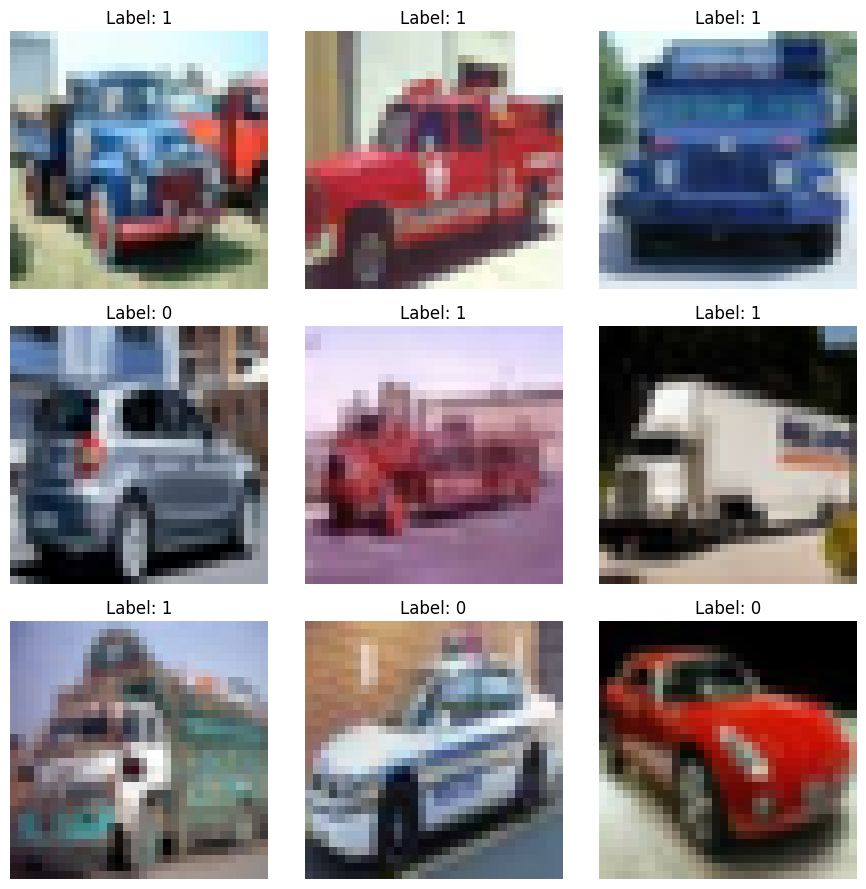

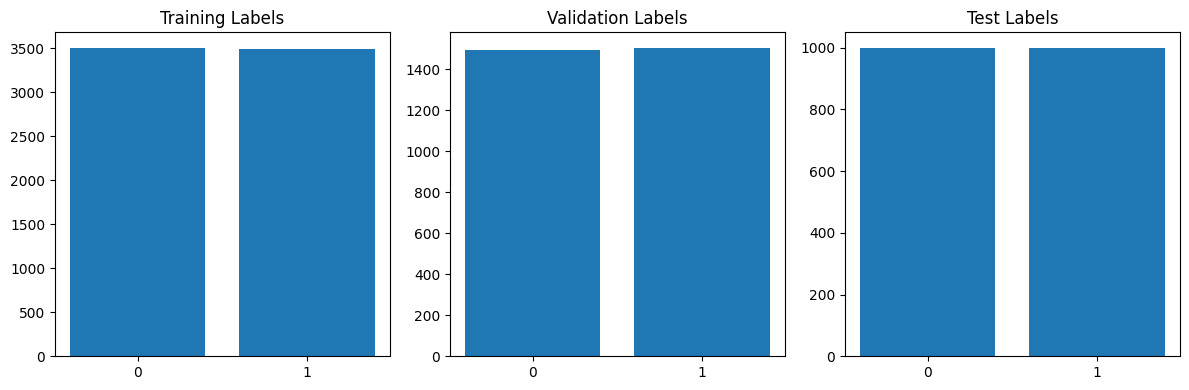

In [7]:
### YOUR CODE HERE
##2. examine a single image
plt.imshow(X_train[0])
plt.title('Sample Image')
plt.show()

print(X_train[0].shape)
plt.figure(figsize=(12, 4))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(X_train[0][:,:,i])
  plt.title(f'Channel {i+1}')
plt.show()
##3. select and plot 9 random images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_train))
    ax.imshow(X_train[index])
    ax.set_title(f'Label: {y_train[index]}')
    ax.axis('off')
plt.tight_layout()
plt.show()
##4.plot the dist of labels in the training, validation and test sets
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(y_train, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.title('Training Labels')
plt.xticks([0, 1])

plt.subplot(1, 3, 2)
plt.hist(y_val, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.title('Validation Labels')
plt.xticks([0, 1])

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.title('Test Labels')
plt.xticks([0, 1])

plt.tight_layout()
plt.show()


## 2.2 Preprocessing

- Rescale the images data, so that the values lie between a range of 0 and 1.
- Hint: A simple way to do this is to divide by 255.0

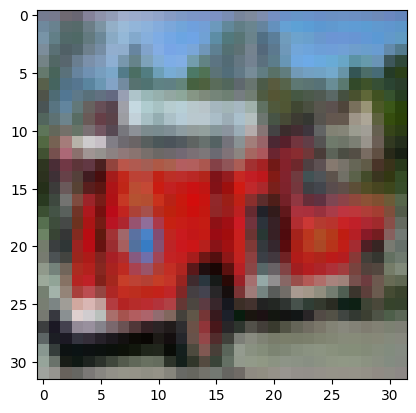

In [ ]:
### YOUR CODE HERE
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
plt.imshow(X_train[0])

## 2.3 Feedforward Neural Network

Reshape your data so that each image is flattened into a 1d array, and each of the train, test and validation sets are 2d arrays.

Essentially, your data should be an array of length N, where N is the number of observations (images) in the train / test / validation sets. Each element in the array is a flattened image, of length 3072 (32 X 32 X3)     


In [ ]:
#### YOUR CODE HERE
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
print(X_train_flattened[0].shape)
print(X_train_flattened.shape)

(3072,)
(7000, 3072)



### 2.3.1 Build a neural network with the following parameters

  - Architecture
     - Input dimensions: 3072
     - 1 hidden layer: 64 nodes, Relu activation
     - Output layer: 1 node, Sigmoid activation
 - Compile the network:
     - Optimizer: Adam
     - Epochs: 30
     - Batch size: 32
     - Metrics: Accuracy
     - Remember to include the validation data in the compilation step.
  - Outputs:
      - Plot the training and validation accuracy by epoch (See the example plot below). Do you see any evidence of overfitting in your plot?
      - Report the accuracy, Precision and Recall on the test set
      
**Example plot**

<!-- ![ffn_performance](../images/example_plot_ffn.png) -->
![ffn_performance](https://drive.google.com/uc?id=1uY4l5ZKEZnFaUFhTRk_SuBOrdXjv5565)

In [ ]:
### YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score
#1. define the model
model = Sequential([
    Dense(64,input_dim = X_train_flattened[0].shape[0],activation ='relu'),
    Dense(1,activation = 'sigmoid')
])
#2. compile the network and train the model
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
trained_model = model.fit(X_train_flattened, y_train,epochs=30,batch_size=32,validation_data=(X_val_flattened,y_val),verbose=2)


Epoch 1/30
219/219 - 2s - loss: 0.6412 - accuracy: 0.6460 - val_loss: 0.6048 - val_accuracy: 0.6753 - 2s/epoch - 10ms/step
Epoch 2/30
219/219 - 1s - loss: 0.6024 - accuracy: 0.6803 - val_loss: 0.6317 - val_accuracy: 0.6497 - 1s/epoch - 6ms/step
Epoch 3/30
219/219 - 1s - loss: 0.5808 - accuracy: 0.6919 - val_loss: 0.6162 - val_accuracy: 0.6657 - 1s/epoch - 6ms/step
Epoch 4/30
219/219 - 1s - loss: 0.5766 - accuracy: 0.7007 - val_loss: 0.6178 - val_accuracy: 0.6583 - 1s/epoch - 5ms/step
Epoch 5/30
219/219 - 1s - loss: 0.5631 - accuracy: 0.7086 - val_loss: 0.5642 - val_accuracy: 0.7080 - 1s/epoch - 6ms/step
Epoch 6/30
219/219 - 1s - loss: 0.5486 - accuracy: 0.7227 - val_loss: 0.5627 - val_accuracy: 0.7130 - 1s/epoch - 5ms/step
Epoch 7/30
219/219 - 1s - loss: 0.5419 - accuracy: 0.7264 - val_loss: 0.5513 - val_accuracy: 0.7217 - 1s/epoch - 5ms/step
Epoch 8/30
219/219 - 1s - loss: 0.5269 - accuracy: 0.7386 - val_loss: 0.5573 - val_accuracy: 0.7190 - 1s/epoch - 6ms/step
Epoch 9/30
219/219 - 2s

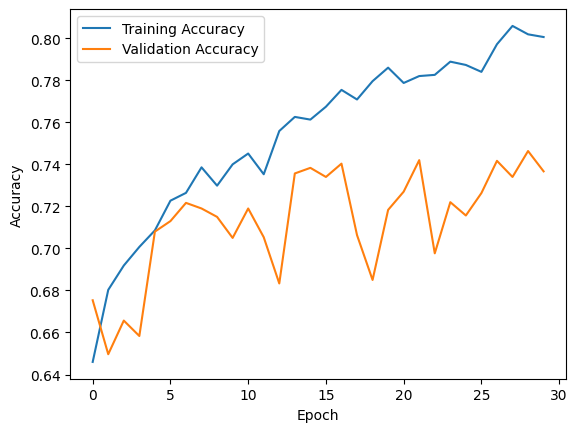

63/63 - 0s - loss: 0.5706 - accuracy: 0.7215 - 131ms/epoch - 2ms/step
63/63 [==============================] - 0s 2ms/step
Test Accuracy: 0.7214999794960022
Precision: 0.6965394616127014
Recall: 0.7850000262260437


In [ ]:
#3. plot the training and validation accuracy by epoch
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#4. report the accuracy, precision and recall on the test set
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test, verbose=2)
y_pred = (model.predict(X_test_flattened) > 0.5).astype("int32")

precision = Precision()
recall = Recall()
precision.update_state(y_test, y_pred)
recall.update_state(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')

The accuracy plot indicates potential signs of overfitting. Because the training accuracy continues to improve with each epoch, while the validation accuracy improves at a slower rate and exhibits greater variability.

### 2.3.2. Tuning / Improving Performance

Now, go ahead and tune this network, or write up your own from scratch. The goal should be to exceed 75% overall classification accuracy on the test set. We don't expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that's acceptable to you via trial and error.  

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions,
  - type regularization,
  - optimization techniques
  
Note that you shouldn't need to train your model for more than 30 epochs.
  
The notebooks from Labs 9 and 10 are also a good starting point.
  

**Outputs:**
- In 2-3 sentences, briefly explain the various choices/ decisions you made in building your model architecture.
- Report the classification accuracy on the test set, along with the precision and recall for each class.
- What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to your outputs from 2.3.1?

In [ ]:
### YOUR CODE HERE
from tensorflow.keras.layers import MaxPooling1D,Dropout
from keras.optimizers import Nadam
#1. define the model
model2 = Sequential([
    Dense(256,input_dim = X_train_flattened[0].shape[0],activation ='relu'),
    Dense(256,activation ='relu'),
    Dense(64,activation='sigmoid'),
    Dense(1,activation = 'sigmoid')
])
#2. compile the network and train the model
model2.compile(optimizer=Nadam(),loss='binary_crossentropy',metrics=['accuracy'])
trained_model2 = model2.fit(X_train_flattened, y_train,epochs=30,batch_size=128,validation_data=(X_val_flattened,y_val),verbose=2)



Epoch 1/30
219/219 - 6s - loss: 0.6290 - accuracy: 0.6460 - val_loss: 0.6048 - val_accuracy: 0.6807 - 6s/epoch - 26ms/step
Epoch 2/30
219/219 - 3s - loss: 0.5882 - accuracy: 0.6876 - val_loss: 0.5877 - val_accuracy: 0.6933 - 3s/epoch - 13ms/step
Epoch 3/30
219/219 - 4s - loss: 0.5688 - accuracy: 0.7034 - val_loss: 0.5891 - val_accuracy: 0.6917 - 4s/epoch - 18ms/step
Epoch 4/30
219/219 - 3s - loss: 0.5493 - accuracy: 0.7169 - val_loss: 0.5633 - val_accuracy: 0.7090 - 3s/epoch - 14ms/step
Epoch 5/30
219/219 - 3s - loss: 0.5283 - accuracy: 0.7333 - val_loss: 0.5541 - val_accuracy: 0.7223 - 3s/epoch - 13ms/step
Epoch 6/30
219/219 - 3s - loss: 0.5208 - accuracy: 0.7414 - val_loss: 0.5652 - val_accuracy: 0.7207 - 3s/epoch - 13ms/step
Epoch 7/30
219/219 - 4s - loss: 0.5082 - accuracy: 0.7464 - val_loss: 0.5504 - val_accuracy: 0.7217 - 4s/epoch - 17ms/step
Epoch 8/30
219/219 - 4s - loss: 0.4950 - accuracy: 0.7537 - val_loss: 0.5599 - val_accuracy: 0.7217 - 4s/epoch - 16ms/step
Epoch 9/30
219/2

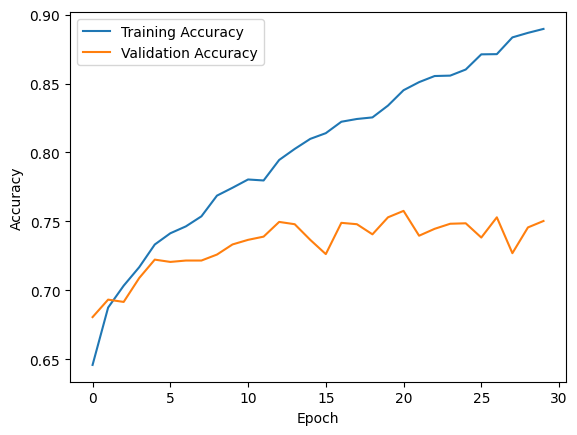

63/63 - 0s - loss: 0.6936 - accuracy: 0.7525 - 213ms/epoch - 3ms/step
63/63 [==============================] - 0s 3ms/step
Test Accuracy: 0.7524999976158142
Precision: 0.7425552606582642
Recall: 0.7730000019073486


In [ ]:
#3. plot the training and validation accuracy by epoch
plt.plot(trained_model2.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#4. report the accuracy, precision and recall on the test set
test_loss2, test_accuracy2 = model2.evaluate(X_test_flattened, y_test, verbose=2)
y_pred2 = (model2.predict(X_test_flattened) > 0.5).astype("int32")

precision2 = Precision()
recall2 = Recall()
precision2.update_state(y_test, y_pred2)
recall2.update_state(y_test, y_pred2)

print(f'Test Accuracy: {test_accuracy2}')
print(f'Precision: {precision2.result().numpy()}')
print(f'Recall: {recall2.result().numpy()}')

**Outputs:**
- In 2-3 sentences, briefly explain the various choices/ decisions you made in building your model architecture.  
Mainly, I added more Dense Layer with more dimensions to learn the features better.
Then, I used Nadam as the optimizer, which adjusts the learning rate on a per-parameter basis and can oftern converge to the optimal solution faster than Adam.
- Report the classification accuracy on the test set, along with the precision and recall for each class.  
Test Accuracy: 0.7524999976158142
Precision: 0.7425552606582642
Recall: 0.7730000019073486
- What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to your outputs from 2.3.1?  
The output in 2.3.2 demonstrated a higher accuracy(75.25%) (correctly identified a higher percentage of the total number of cases), a higher precision(fewer false positives) and a bit lower recall.

## 2.4. Convolutional Neural Network


### 2.4.1. Build a CNN with the following parameters

  - Architecture
     - Input dimensions: (32, 32,  3)
     - 1 Conv2D Layer:
         - Number of filters: 20.
         - Filter Dimension: 3 X 3.
         - Activation: Relu
     - Flatten
     - Output layer: 1 node, Sigmoid activation
 - Compile the network:
     - Optimizer: Adam
     - Epochs: 20
     - Metrics: Accuracy
     - Remember to include the validation data in the compilation step.
  - Outputs:
      - Plot the training and validation accuracy by epoch.
      - Report the accuracy, Precision and Recall on the test set

In [ ]:
### Your Code Here:
from tensorflow.keras.layers import Conv2D,Flatten,Dense

input_shape = X_train[0].shape
#1.define the CNN model
cnn = Sequential([
    Conv2D(20,(3,3),activation='relu',input_shape=input_shape),
    Flatten(),
    Dense(1,activation='sigmoid')
])

#2.compile the model
cnn.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

#3.train the model
cnn_output = cnn.fit(X_train,y_train,epochs=20,batch_size=32,
           validation_data=(X_val,y_val),verbose=2)


Epoch 1/20
219/219 - 4s - loss: 0.5949 - accuracy: 0.6839 - val_loss: 0.5311 - val_accuracy: 0.7447 - 4s/epoch - 20ms/step
Epoch 2/20
219/219 - 3s - loss: 0.5028 - accuracy: 0.7616 - val_loss: 0.5056 - val_accuracy: 0.7560 - 3s/epoch - 16ms/step
Epoch 3/20
219/219 - 3s - loss: 0.4468 - accuracy: 0.7959 - val_loss: 0.4902 - val_accuracy: 0.7677 - 3s/epoch - 15ms/step
Epoch 4/20
219/219 - 3s - loss: 0.4075 - accuracy: 0.8270 - val_loss: 0.4428 - val_accuracy: 0.7980 - 3s/epoch - 12ms/step
Epoch 5/20
219/219 - 3s - loss: 0.3745 - accuracy: 0.8417 - val_loss: 0.4383 - val_accuracy: 0.7983 - 3s/epoch - 12ms/step
Epoch 6/20
219/219 - 3s - loss: 0.3509 - accuracy: 0.8526 - val_loss: 0.4264 - val_accuracy: 0.8043 - 3s/epoch - 12ms/step
Epoch 7/20
219/219 - 4s - loss: 0.3338 - accuracy: 0.8589 - val_loss: 0.4117 - val_accuracy: 0.8120 - 4s/epoch - 20ms/step
Epoch 8/20
219/219 - 3s - loss: 0.3133 - accuracy: 0.8727 - val_loss: 0.4338 - val_accuracy: 0.7973 - 3s/epoch - 12ms/step
Epoch 9/20
219/2

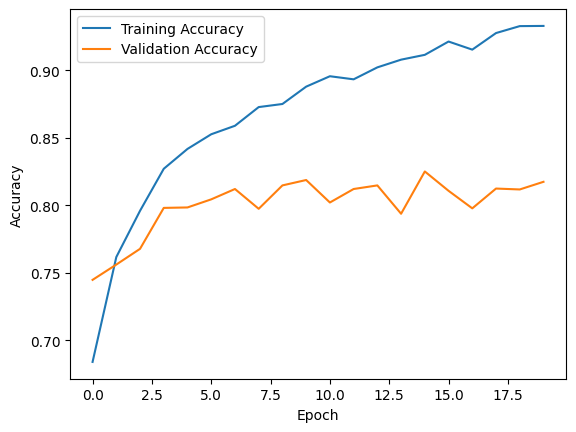

63/63 - 0s - loss: 0.4549 - accuracy: 0.8140 - 327ms/epoch - 5ms/step
63/63 [==============================] - 0s 5ms/step
Test Accuracy: 0.8140000104904175
Precision: 0.8264033198356628
Recall: 0.7950000166893005


In [ ]:
##evaluations
#4.Plot training and validation accuracy
plt.plot(cnn_output.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_output.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#5.Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test, verbose=2)
y_pred = (cnn.predict(X_test) > 0.5).astype(int)

#Calculate Precision and Recall
precision = Precision()
recall = Recall()
precision.update_state(y_test, y_pred)
recall.update_state(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')

### 2.4.2. Tuning / Improving Performance

Now, go ahead and tune this network, or write up your own from scratch. The goal should be to exceed 85% overall classification accuracy on the test set. We don't expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that's acceptable to you via trial and error.

Note that you shouldn't need to train your model for more than 30 epochs.

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions,
  - type regularization,
  - optimization techniques
  - and other relevant aspects(adding data augmentation etc.)
  
The notebooks from Labs 9 and 10 are a good starting point in terms of putting together a more complex architecture.

<span style="color:red">Warning!</span> If you intend to attempt **Extra Credit 1 and 2** (below), ensure that you carefully name / store the trained model you build in this step. It's fine to keep trained model in memory, or to save the weights to disk.

  

**Outputs:**
 - Report the classification accuracy on the test set, along with the precision and recall for each class.
 - Briefly explain your model architecture / choices you made in tuning your CNN (No more than 3 - 4 sentences)
 - What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to the feed forward neural networks from part 2.3, and your baseline in 2.4.1?

In [ ]:
### Your Code Here:
from keras.layers import BatchNormalization,MaxPooling2D
#1.define the CNN model
cnn2 = Sequential([
    Conv2D(128,(3,3),activation='relu',input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='sigmoid'),
    Dense(1,activation='sigmoid')
])

### data augmentation
#from keras.preprocessing.image import ImageDataGenerator
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
#2.compile the model
cnn2.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

#3.train the model
cnn_output2 = cnn2.fit(X_train,y_train,epochs=20,batch_size=64,
           validation_data=(X_val,y_val),verbose=2)


Epoch 1/20
110/110 - 39s - loss: 0.4905 - accuracy: 0.7556 - val_loss: 0.6122 - val_accuracy: 0.6963 - 39s/epoch - 354ms/step
Epoch 2/20
110/110 - 35s - loss: 0.3269 - accuracy: 0.8607 - val_loss: 0.7894 - val_accuracy: 0.5240 - 35s/epoch - 316ms/step
Epoch 3/20
110/110 - 37s - loss: 0.2540 - accuracy: 0.8957 - val_loss: 0.5642 - val_accuracy: 0.7003 - 37s/epoch - 332ms/step
Epoch 4/20
110/110 - 35s - loss: 0.2150 - accuracy: 0.9166 - val_loss: 0.4514 - val_accuracy: 0.7830 - 35s/epoch - 318ms/step
Epoch 5/20
110/110 - 38s - loss: 0.1598 - accuracy: 0.9384 - val_loss: 0.4475 - val_accuracy: 0.8020 - 38s/epoch - 350ms/step
Epoch 6/20
110/110 - 37s - loss: 0.1232 - accuracy: 0.9577 - val_loss: 0.9180 - val_accuracy: 0.6830 - 37s/epoch - 337ms/step
Epoch 7/20
110/110 - 37s - loss: 0.0969 - accuracy: 0.9627 - val_loss: 0.3393 - val_accuracy: 0.8747 - 37s/epoch - 339ms/step
Epoch 8/20
110/110 - 39s - loss: 0.0639 - accuracy: 0.9774 - val_loss: 0.8179 - val_accuracy: 0.7457 - 39s/epoch - 351

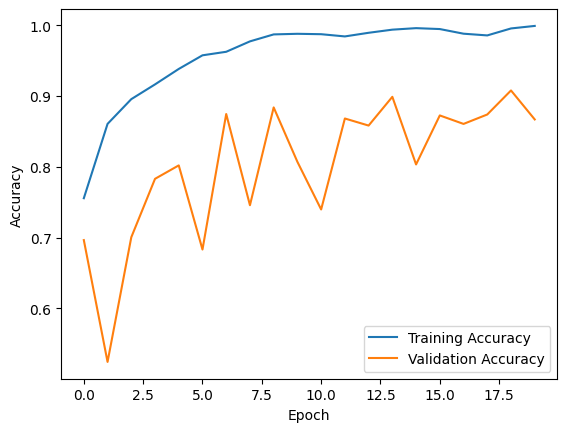

63/63 - 4s - loss: 0.6558 - accuracy: 0.8575 - 4s/epoch - 56ms/step
63/63 [==============================] - 3s 36ms/step
Test Accuracy: 0.8575000166893005
Precision: 0.8037382960319519
Recall: 0.9459999799728394


In [ ]:
##evaluations
#4.Plot training and validation accuracy
plt.plot(cnn_output2.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_output2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#5.Evaluate the model on the test set
test_loss, test_accuracy = cnn2.evaluate(X_test, y_test, verbose=2)
y_pred = (cnn2.predict(X_test) > 0.5).astype(int)

#Calculate Precision and Recall
precision = Precision()
recall = Recall()
precision.update_state(y_test, y_pred)
recall.update_state(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')

**Outputs:**
 - Report the classification accuracy on the test set, along with the precision and recall for each class.  
 As above.
 - Briefly explain your model architecture / choices you made in tuning your CNN (No more than 3 - 4 sentences)    
 Firstly, I added more layers to learn features better. For example, I used 3 Conv2D layers with the relu function. Then I used BatchNormalization() after each convolutional layer to accelerate training and stabilize the network by normalizing and scaling activations. And I used MaxPooling2D() to reduce the spatial dimensions of the feature maps, which helps to decrease the computational load and reduce overfitting.

 - What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to the feed forward neural networks from part 2.3, and your baseline in 2.4.1?  
 Compared to the output in 2.3 and the baseline in 2.4.1, it should be noticed that all the indexes here are far higher than the others.

### 2.5: Convolutional Filters

Now, let's attempt to better understand what our CNN is doing under the hood. We'll start by visually examining our convolutional filters.

- We'll focus on the first convolutional layer in your CNN.
    - Use the [get_weights()](https://keras.io/api/layers/base_layer/#getweights-method) method to obtain the filters.
    - Plot the first 5 filters, for each channel (your plot will be a grid of 5 X 3).
    - Your plot will resemble the one below (the exact nature of the visual patterns will depend on your model architecture etc.)
    - What do you observe about the filters you visualize?
    
**Example output**
 ![Example](https://drive.google.com/uc?id=1T2U7Eul4opG9newKqbH-9Hc40lRIpAv2)

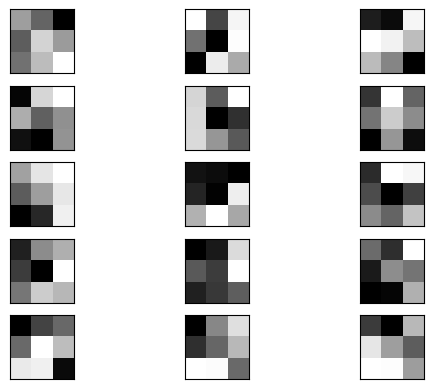

In [ ]:
## YOUR CODE HERE
#get the weights of the first convolutional layer
filters,biases = cnn2.layers[0].get_weights()
#normalize filter values to 0-1 to visualize
f_min, f_max = filters.min(),filters.max()
filters=(filters-f_min)/(f_max-f_min)

# Plot first 5 filters
n_filters, ix = 5, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    #each channel
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()



1.   The filters contain various shades of gray, indicating different weights that the convolutional layer has learned to detect certain features in the input images. Lighter shades often represent larger weights, while darker shades may correspond to negative weights.
2.   Filters that have contrasting regions of light and dark shades are usually indicators of edge detection  
3.   This set of filters have a diverse representation to effectively capture various aspects of the visual data.



### Extra Credit 1: Feature Maps

A feature map, or an activation map allows us to examine the result of applying the filters to a given input. The broad intuition is that feature maps closer to the input image detect fine-grained detail, whereas feature maps closer to the output of the model capture more generic aspects.

Your task is to create and visualize a feature map (i.e the outputs) from the first convolutional layer in your trained CNN.

In order to do this, proceed as follows:
- Identify a nice image from your training data -- ideally, something that has some distinguishing properties to the naked eye.
- Pass this image through your trained CNN from **2.4.2**, and store the output from the first convolutional layer -- this is your feature map! Note that there are multiple ways to do this; the simplest is to create a copy of your trained CNN, and remove the later layers. The Models function can help you do this.
- Note that the size of the feature map depends on how many filters you have in the layer.
- Outputs:
    - plot 1) The raw image from the training data, and 2) the feature map. An example is shown below:
    - what do you observe about the feature maps?
    
**Raw Image**
![Plane](https://drive.google.com/uc?id=1ug_H9sgQorHcd5RhD2Q4dNabszdkJIzD)

**Feature Map**
![Plane-features](https://drive.google.com/uc?id=1BJ3Ht0w_gMDuwuK1uE8RDnIaxym4IDsr)

1/1 [==============================] - 0s 74ms/step
num of feature maps is: 128


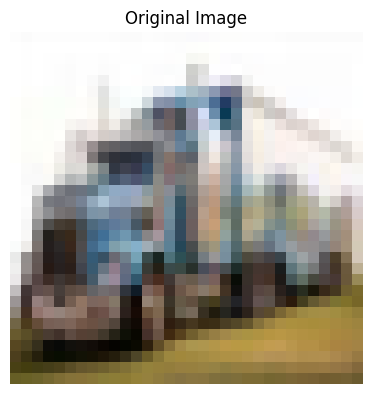

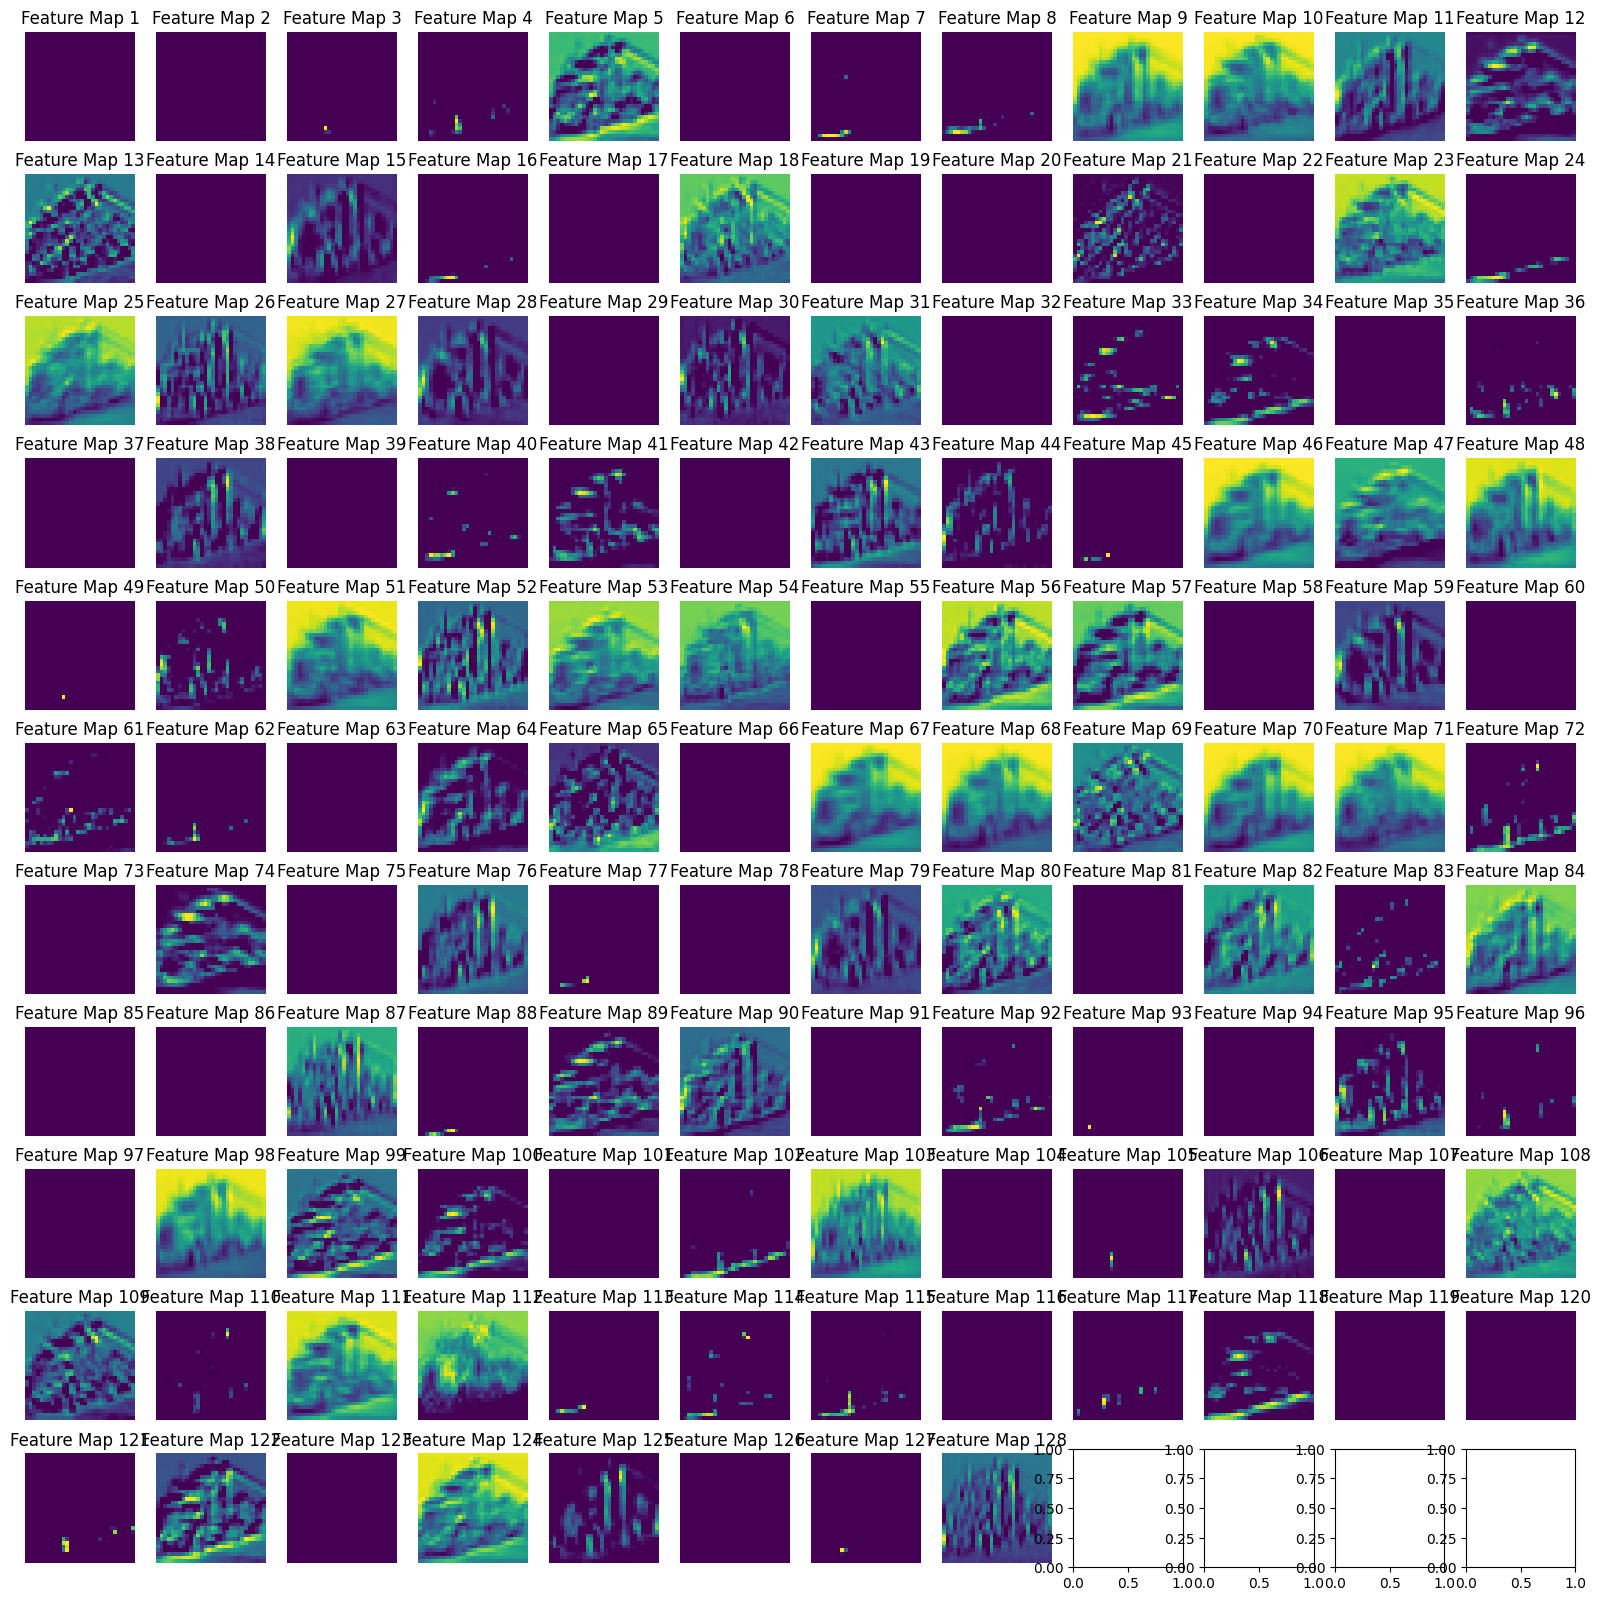

In [ ]:
### YOUR CODE HERE
from tensorflow.keras.models import Model
# First, store the inputs / outputs from the first convolutional / hidden layer in your network.
# Hint: The keras documentation will be helpful (https://keras.io/guides/functional_api/)
# Note that you can create a model using another model/ layer's inputs / outputs:
# model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
first_layer_output = cnn2.layers[0].output
first_layer_model = Model(inputs=cnn2.input,outputs=first_layer_output)

#identify a nice picture from the training data
index = 100
selected_image = X_train[index]
selected_image_expanded = np.expand_dims(selected_image,axis=0)
# Then, pass your chosen image through(i.e predict)
feature_maps = first_layer_model.predict(selected_image_expanded)

## Plot the original image, and the feature maps

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(selected_image)
plt.title('Original Image')
plt.axis('off')

n_maps = feature_maps.shape[-1]
print("num of feature maps is:",n_maps)

fig, axes = plt.subplots(int(n_maps**0.5), int(np.ceil(n_maps/int(n_maps**0.5))), figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    if i < n_maps:
        ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
        ax.set_title(f'Feature Map {i+1}')
        ax.axis('off')
plt.show()

What do you observe in the feature map?  


*   Firstly, the number of the feature maps here is the parameter which we set in the first convolutional layer.
*   I noticed that there're lots of "empty" feature maps, which may indicate that for image1, it might not be detected all features that are included in other images.
*   Some represent edges, while others represent textures or specific shapes and objects in the input image.



### Extra Credit 2: Transfer Learning / Fine tuning


Suppose you have a slightly different classification task at hand: to correctly separate trucks from airplanes.

We'll examine how we can use an already trained model to do this, instead of coding up a new neural network from scratch.

You are required to implement two approaches:

- First, we'll use the CNN from D2 above -- and simply update the weights.
- Second, we'll load a pre-trained model from keras/ tensorflow (e.g. ResNet50, or VGG19). While these models haven't seen the exact images in this dataset, they have been trained on a large general corpus. Since these models have millions of weights, so we'll implement the following approach:
    - Load a pre-trained model
    - Freeze the weights by setting trainable = False.
    - Build a new model by adding additional layers to the base model.
    - Train the new model and evaluate performance.
    
- Compare the performance of both approaches, and briefly summarize your observations

We have provided some helper code and hints in the cells below.
    
<span style="color:red">Warning!</span> Note that the second approach could be slow / time-consuming. If you are attempting it, please ensure that you budget ~20 mins to 1hour (worst case) for the code to complete running for this part.

This is a handy reference: https://keras.io/guides/transfer_learning/#transfer-learning-amp-finetuning

In [ ]:
def cifar_2moreclasses(pos_class, neg_class):
    """
    Helper code to clean the CIFAR 10 dataset, and remove the unnecessary classes.
    """
    ## Load data
    label_names = ["airplane",
             "automobile",
             "bird",
             "cat",
             "deer",
             "dog",
             "frog",
             "horse",
             "ship",
             "truck"]


    label_map = {i:99 for i in range(len(label_names))}
    label_map[pos_class] = 1
    label_map[neg_class] = 0

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()
    y_train_val1 = np.array([[label_map[y[0]]] for y in y_train_val])
    y_test1 = np.array([[label_map[y[0]]] for y in y_test])

    X_train_val_clean = X_train_val[np.where(y_train_val1 != 99)[0]]
    y_train_val_clean =  y_train_val1[np.where(y_train_val1 != 99)]

    X_test_clean = X_test[np.where(y_test1 != 99 )[0]]
    y_test_clean = y_test1[np.where(y_test1 != 99)]

    return X_train_val_clean, y_train_val_clean, X_test_clean, y_test_clean

In [ ]:
## Load data
X_train_val1, y_train_val1, X_test1, y_test1 = cifar_2moreclasses(9, 0)

## Split into train, validation and test.
N_train, N_validation, N_test = 7000, 3000, 2000

X_train1 = X_train_val1[:N_train,:,:]
y_train1 = y_train_val1[:N_train]

X_val1 = X_train_val1[N_train: N_train + N_validation,:,:]
y_val1 = y_train_val1[N_train: N_train + N_validation]

X_test1 = X_test1[:N_test]
y_test1 = y_test1[:N_test]

print(X_train1.shape, X_val1.shape, X_test1.shape)

(7000, 32, 32, 3) (3000, 32, 32, 3) (2000, 32, 32, 3)


In [ ]:
#### APPROACH 1

In [ ]:
from keras.models import clone_model

# Helper Code: Cloning the model (Edit the line below with the name of your model from D2)
model_cnn3 = clone_model( cnn2 )

# To do: Compile the model
model_cnn3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# To do: Copy weights from model_from_D2.
#Reference: https://keras.io/2.15/api/models/model_saving_apis/weights_saving_and_loading/
for layer,source_layer in zip(model_cnn3.layers, cnn2.layers):
  layer.set_weights(source_layer.get_weights())

# To do: Preprocess the data
# Normalize image data to 0-1
X_train1 = X_train1.astype('float32') / 255.0
X_val1 = X_val1.astype('float32') / 255.0
X_test1 = X_test1.astype('float32') / 255.0

# To do: Train this model (10 epochs)
trained_cnn3 = model_cnn3.fit(X_train1,y_train1,epochs=10,validation_data=(X_val1,y_val1))

#To do: Evaluate performance
test_loss, test_accuracy = model_cnn3.evaluate(X_test1, y_test1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/10
219/219 [==============================] - 45s 198ms/step - loss: 0.2567 - accuracy: 0.9083 - val_loss: 0.4151 - val_accuracy: 0.8183
Epoch 2/10
219/219 [==============================] - 39s 177ms/step - loss: 0.1287 - accuracy: 0.9507 - val_loss: 0.2705 - val_accuracy: 0.8993
Epoch 3/10
219/219 [==============================] - 36s 165ms/step - loss: 0.0974 - accuracy: 0.9660 - val_loss: 0.9270 - val_accuracy: 0.7223
Epoch 4/10
219/219 [==============================] - 40s 183ms/step - loss: 0.0739 - accuracy: 0.9730 - val_loss: 0.4429 - val_accuracy: 0.8580
Epoch 5/10
219/219 [==============================] - 46s 209ms/step - loss: 0.0569 - accuracy: 0.9781 - val_loss: 0.2607 - val_accuracy: 0.9190
Epoch 6/10
219/219 [==============================] - 40s 181ms/step - loss: 0.0438 - accuracy: 0.9827 - val_loss: 0.3127 - val_accuracy: 0.9073
Epoch 7/10
219/219 [==============================] - 39s 176ms/step - loss: 0.0549 - accuracy: 0.9803 - val_loss: 0.2351 - val_ac

In [ ]:
### APPROACH 2

In [ ]:


## Helper code: load pre-trained model. Feel free to load something else.
## Available options can be found here: https://keras.io/api/applications/#keras-applications

from keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
base_model_1 = ResNet50(include_top = False, weights='imagenet',input_shape=(32,32,3))

## To Do: Freeze the weights
for layer in base_model_1.layers:
  layer.trainable = False

## Now initialize a new model -- add the pre-trained weights, along with some additional layers.
# Hint / helper code -- here's one way to do this, but feel free to use your own.
# model_1= Sequential()
# model_1.add(base_model_1)
# model_1.add(Flatten())
modelpro = Sequential()
modelpro.add(base_model_1)
modelpro.add(GlobalAveragePooling2D())
modelpro.add(Dense(256,activation='relu'))
modelpro.add(Dropout(0.5))
modelpro.add(Dense(128,activation='relu'))
modelpro.add(Dropout(0.3))
modelpro.add(Dense(1,activation='sigmoid'))

# To Do: Add new dense layers along with Dropout etc. Add at least 2 dense layers -- you are free to pick the number of nodes.
# Remember to finish with the classification head (i.e Dense layer with 1 node and sigmoid activation. )


## To Do: Compile the Model
modelpro.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
## To do: print the model summary. Ensure that weights for the pre-trained model are frozen.
print(modelpro.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_28 (Dense)            (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                     

In [ ]:
## To do: Fit the model for 10 epochs.
trained_modelpro=modelpro.fit(
    X_train1,y_train1,
    epochs=10,
    validation_data=(X_val1,y_val1),
    batch_size=32
)

Epoch 1/10
219/219 [==============================] - 56s 258ms/step - loss: 0.5130 - accuracy: 0.7309 - val_loss: 0.4499 - val_accuracy: 0.8393
Epoch 2/10
219/219 [==============================] - 51s 234ms/step - loss: 0.5066 - accuracy: 0.7357 - val_loss: 0.4418 - val_accuracy: 0.8260
Epoch 3/10
219/219 [==============================] - 51s 233ms/step - loss: 0.4778 - accuracy: 0.7786 - val_loss: 0.4842 - val_accuracy: 0.8230
Epoch 4/10
219/219 [==============================] - 51s 233ms/step - loss: 0.4935 - accuracy: 0.7636 - val_loss: 0.3974 - val_accuracy: 0.8353
Epoch 5/10
219/219 [==============================] - 53s 241ms/step - loss: 0.4793 - accuracy: 0.7683 - val_loss: 0.4361 - val_accuracy: 0.8207
Epoch 6/10
219/219 [==============================] - 51s 234ms/step - loss: 0.4645 - accuracy: 0.7830 - val_loss: 0.4269 - val_accuracy: 0.8377
Epoch 7/10
219/219 [==============================] - 51s 234ms/step - loss: 0.4672 - accuracy: 0.7811 - val_loss: 0.4014 - val_ac

63/63 [==============================] - 8s 131ms/step - loss: 0.4118 - accuracy: 0.8460
Test Loss: 0.4117847979068756, Test Accuracy: 0.8460000157356262


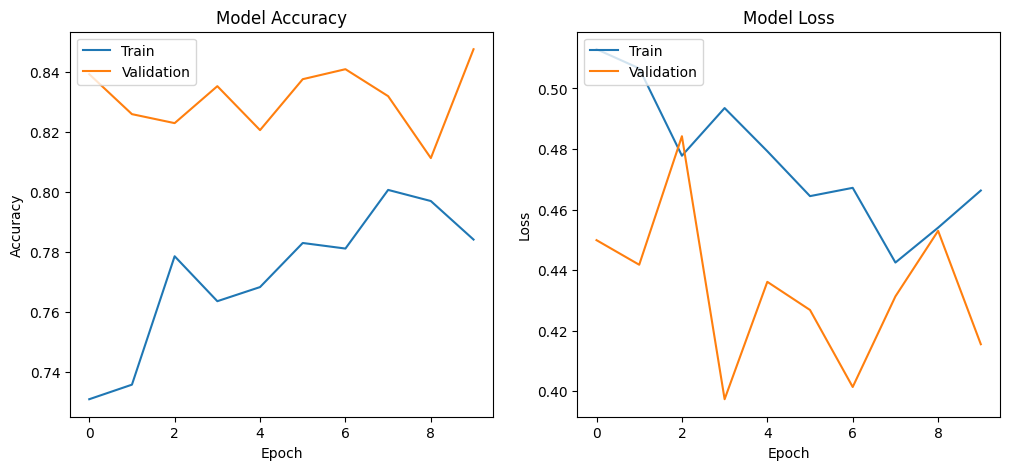

In [ ]:
#To do: Evaluate model performance
test_loss, test_accuracy = modelpro.evaluate(X_test1, y_test1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(trained_modelpro.history['accuracy'], label='Train')
plt.plot(trained_modelpro.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trained_modelpro.history['loss'], label='Train')
plt.plot(trained_modelpro.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


Compare the performance of both approaches, and briefly summarize your observations  


*   For Approach1, Test Loss: 0.6193349957466125, Test Accuracy: 0.8314999938011169
*   For Approach2, Test Loss: 0.4117847979068756, Test Accuracy: 0.8460000157356262.  
*   As a result, the approach2 has a better performance in the task, which might indicate that the pretrained model will improve both the efficiency and accuracy.